In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv("D:/covid_19_india.csv")

In [4]:
data.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30-01-2020  6:00 PM               Kerala                       1   
1    2  31-01-2020  6:00 PM               Kerala                       1   
2    3  01-02-2020  6:00 PM               Kerala                       2   
3    4  02-02-2020  6:00 PM               Kerala                       3   
4    5  03-02-2020  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0    0.0     0.0        1.0  
1                        0    0.0     0.0        1.0  
2                        0    0.0     0.0        2.0  
3                        0    0.0     0.0        3.0  
4                        0    0.0     0.0        3.0

In [5]:
data.shape

(18110, 9)

In [6]:
data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.drop(['Sno','Time'],axis = 1, inplace = True)

In [9]:
data

Date State/UnionTerritory ConfirmedIndianNational  \
0     2020-01-30               Kerala                       1   
1     2020-01-31               Kerala                       1   
2     2020-01-02               Kerala                       2   
3     2020-02-02               Kerala                       3   
4     2020-03-02               Kerala                       3   
...          ...                  ...                     ...   
18105 2021-11-08            Telangana                       -   
18106 2021-11-08              Tripura                       -   
18107 2021-11-08          Uttarakhand                       -   
18108 2021-11-08        Uttar Pradesh                       -   
18109 2021-11-08          West Bengal                       -   

      ConfirmedForeignNational      Cured   Deaths  Confirmed  
0                            0        0.0      0.0        1.0  
1                            0        0.0      0.0        1.0  
2                            0        0.0      0.0        2.0  
3                            0        0.0      0.0        3.0  
4                            0        0.0      0.0        3.0  
...                        ...        ...      ...        ...  
18105                        -   638410.0   3831.0   650353.0  
18106                        -    77811.0    773.0    80660.0  
18107                        -   334650.0   7368.0   342462.0  
18108                        -  1685492.0  22775.0  1708812.0  
18109                        -  1506532.0  18252.0  1534999.0  

[18110 rows x 7 columns]

In [10]:
data['Cured'].describe()

count    1.810800e+04
mean     2.786683e+05
std      6.149179e+05
min      0.000000e+00
25%      3.361000e+03
50%      3.338000e+04
75%      2.788808e+05
max      6.159676e+06
Name: Cured, dtype: float64

In [11]:
data.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       2
Deaths                      8
Confirmed                   9
dtype: int64

In [12]:
data['Cured'].mode()

0    0.0
Name: Cured, dtype: float64

In [13]:
data['Cured'].fillna(0,inplace = True)

In [14]:
data.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      8
Confirmed                   9
dtype: int64

In [15]:
data['Deaths'].mode()

0    0.0
Name: Deaths, dtype: float64

In [16]:
data['Deaths'].fillna(0,inplace = True)

In [17]:
data.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   9
dtype: int64

In [18]:
data['Confirmed'].mode()

0    1.0
Name: Confirmed, dtype: float64

In [19]:
data['Confirmed'].fillna(1,inplace = True)

In [20]:
data.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [21]:
data['Cured'].describe()

count    1.811000e+04
mean     2.786375e+05
std      6.148909e+05
min      0.000000e+00
25%      3.360250e+03
50%      3.336400e+04
75%      2.788698e+05
max      6.159676e+06
Name: Cured, dtype: float64

In [22]:
data2 = data.groupby(['State/UnionTerritory'])[['State/UnionTerritory','Cured','Deaths','Confirmed']].sum().reset_index()

In [23]:
data2

State/UnionTerritory         Cured      Deaths  \
0                Andaman and Nicobar Islands  1.848286e+06     27136.0   
1                             Andhra Pradesh  3.704265e+08   2939367.0   
2                          Arunachal Pradesh  6.588149e+06     26799.0   
3                                      Assam  9.267868e+07    638323.0   
4                                      Bihar  1.251229e+08   1093466.0   
5                                  Bihar****  1.402468e+06     18881.0   
6           Cases being reassigned to states  0.000000e+00         0.0   
7                                 Chandigarh  1.011704e+07    147694.0   
8                               Chhattisgarh  1.516094e+08   2063920.0   
9                     Dadra and Nagar Haveli  2.035200e+04         8.0   
10  Dadra and Nagar Haveli and Daman and Diu  1.841750e+06      1014.0   
11                               Daman & Diu  0.000000e+00         0.0   
12                                     Delhi  2.734199e+08   4943294.0   
13                                       Goa  2.602720e+07    447801.0   
14                                   Gujarat  1.324871e+08   2219448.0   
15                                   Haryana  1.265853e+08   1502799.0   
16                          Himachal Pradesh  2.750111e+07    491347.0   
17                         Himanchal Pradesh  2.000400e+05      3507.0   
18                         Jammu and Kashmir  5.329734e+07    839694.0   
19                                 Jharkhand  5.803451e+07    748641.0   
20                                Karanataka  2.821491e+06     36197.0   
21                                 Karnataka  4.418444e+08   6053761.0   
22                                    Kerala  4.201742e+08   1888177.0   
23                                    Ladakh  3.758960e+06     45804.0   
24                               Lakshadweep  8.209250e+05      3908.0   
25                            Madhya Pradesh  1.267250e+08   1777752.0   
26                         Madhya Pradesh***  7.807350e+05     10506.0   
27                               Maharashtra  1.018765e+09  23737429.0   
28                            Maharashtra***  6.000911e+06    130753.0   
29                                   Manipur  1.123057e+07    173056.0   
30                                 Meghalaya  6.537909e+06    101950.0   
31                                   Mizoram  2.384602e+06      9791.0   
32                                  Nagaland  4.519526e+06     58460.0   
33                                    Odisha  1.509235e+08    790814.0   
34                                Puducherry  1.848312e+07    312155.0   
35                                    Punjab  9.145816e+07   2785594.0   
36                                 Rajasthan  1.503568e+08   1473089.0   
37                                    Sikkim  2.747214e+06     53150.0   
38                                Tamil Nadu  4.040958e+08   5916658.0   
39                                 Telangana  5.748824e+07    349648.0   
40                                 Telengana  6.466627e+07    400427.0   
41                                   Tripura  1.297685e+07    150342.0   
42                                Unassigned  0.000000e+00         0.0   
43                             Uttar Pradesh  2.914794e+08   4143450.0   
44                               Uttarakhand  4.836274e+07    986001.0   
45                               West Bengal  2.475151e+08   3846989.0   

       Confirmed  
0   1.938498e+06  
1   3.924328e+08  
2   7.176907e+06  
3   9.983701e+07  
4   1.322312e+08  
5   1.430909e+06  
6   3.455650e+05  
7   1.085863e+07  
8   1.637763e+08  
9   2.072200e+04  
10  1.938632e+06  
11  2.000000e+00  
12  2.872277e+08  
13  2.824016e+07  
14  1.434201e+08  
15  1.343473e+08  
16  3.003329e+07  
17  2.045160e+05  
18  5.811773e+07  
19  6.211199e+07  
20  2.885238e+06  
21  4.859707e+08  
22  4.589060e+08  
23  4.054291e+06  
24  9.157840e+05  
25  1.356253e+08  
26  7.916560e+05  
27  1.121491e

In [24]:
data2.describe()

Cured        Deaths     Confirmed
count  4.600000e+01  4.600000e+01  4.600000e+01
mean   1.096984e+08  1.595413e+06  1.185148e+08
std    1.853888e+08  3.701589e+06  2.023824e+08
min    0.000000e+00  0.000000e+00  2.000000e+00
25%    2.765783e+06  2.940125e+04  3.035249e+06
50%    2.676416e+07  3.750375e+05  2.913672e+07
75%    1.310466e+08  1.709014e+06  1.414714e+08
max    1.018765e+09  2.373743e+07  1.121491e+09

In [25]:
columns=['Confirmed','Cured','Deaths']
for i in columns:
    fig=px.treemap(data2[0:46],values=i,path=['State/UnionTerritory'],template="plotly_dark",title="<b>TreeMap representation of different Countries w.r.t. their {}</b>".format(i))
    fig.show()

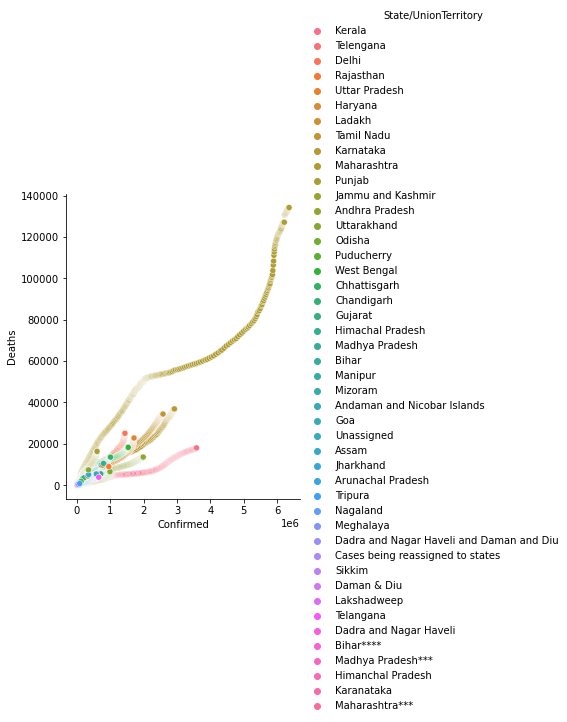

In [26]:
sns.relplot(x = "Confirmed",y="Deaths",hue = "State/UnionTerritory",data=data)

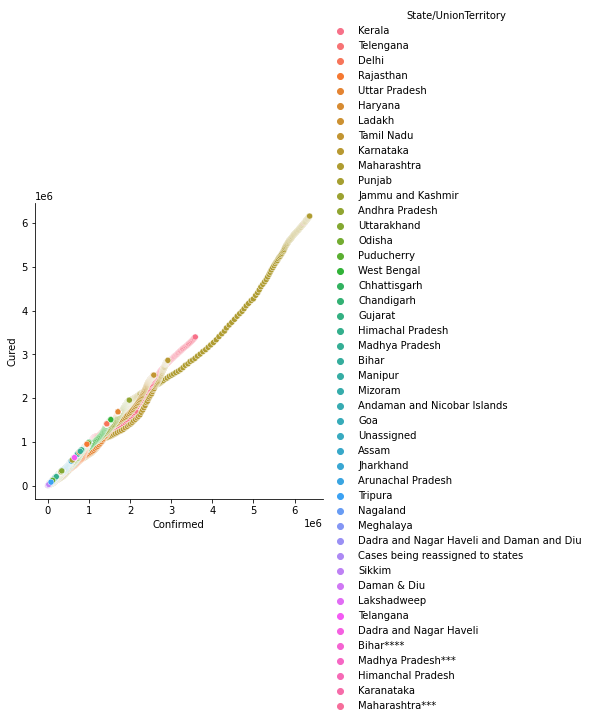

In [27]:
sns.relplot(x = "Confirmed",y="Cured",hue = "State/UnionTerritory",data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Bihar****'),
  Text(6, 0, 'Cases being reassigned to states'),
  Text(7, 0, 'Chandigarh'),
  Text(8, 0, 'Chhattisgarh'),
  Text(9, 0, 'Dadra and Nagar Haveli'),
  Text(10, 0, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(11, 0, 'Daman & Diu'),
  Text(12, 0, 'Delhi'),
  Text(13, 0, 'Goa'),
  Text(14, 0, 'Gujarat'),
  Text(15, 0, 'Haryana'),
  Text(16, 0, 'Himachal Pradesh'),
  Text(17, 0, 'Himanchal Pradesh'),
  Text(18, 0, 'Jammu and Kashmir'),
  Text(19, 0, 'Jharkhand'),
  Text(20, 0, 'Karanataka'),
  Text(21, 0, 'Karnataka'),
  Text(22, 0, 'Kerala'),
  Text(23, 0, 'Ladakh'),
  Text(24, 0, 'Lakshadweep')

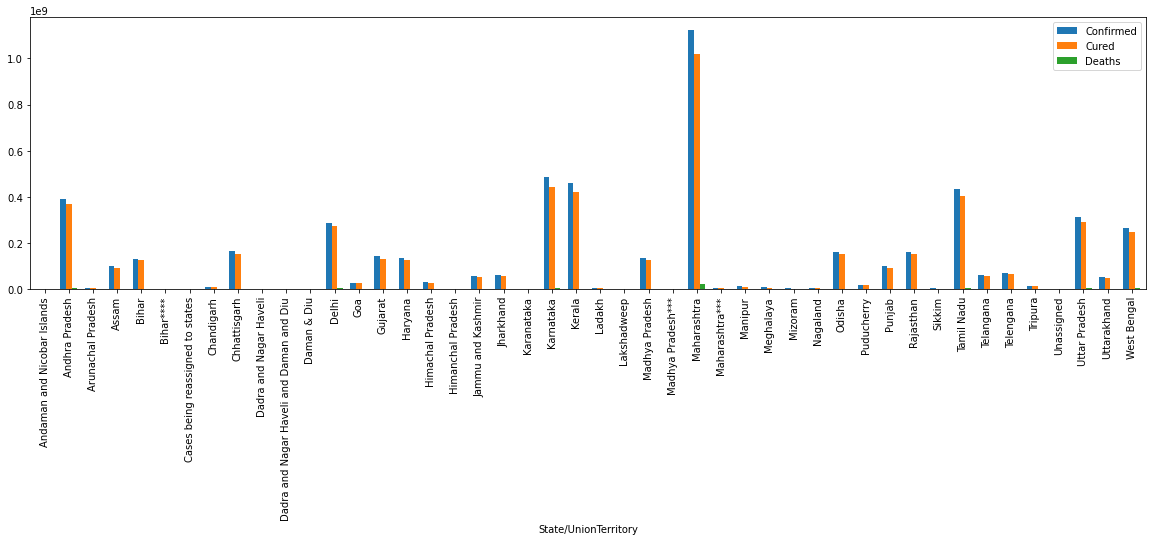

In [28]:
data2.plot(x = "State/UnionTerritory", y = ["Confirmed","Cured","Deaths"] , width = 0.7,kind = "bar" ,figsize = (20,5))
plt.xticks(rotation= 90)

# Conclusion

maharashtra recorded highest no. of confirmed cases and deaths. 

which state highesst number of confirmed case also have highest number of recovery.  

which state highesst number of confirmed case also have highest number of Deaths 

# trends of covid19 according to state wise

In [29]:
data.columns = ["Date","State","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","confirmed"]

In [30]:
data

Date          State ConfirmedIndianNational  \
0     2020-01-30         Kerala                       1   
1     2020-01-31         Kerala                       1   
2     2020-01-02         Kerala                       2   
3     2020-02-02         Kerala                       3   
4     2020-03-02         Kerala                       3   
...          ...            ...                     ...   
18105 2021-11-08      Telangana                       -   
18106 2021-11-08        Tripura                       -   
18107 2021-11-08    Uttarakhand                       -   
18108 2021-11-08  Uttar Pradesh                       -   
18109 2021-11-08    West Bengal                       -   

      ConfirmedForeignNational      Cured   Deaths  confirmed  
0                            0        0.0      0.0        1.0  
1                            0        0.0      0.0        1.0  
2                            0        0.0      0.0        2.0  
3                            0        0.0      0.0        3.0  
4                            0        0.0      0.0        3.0  
...                        ...        ...      ...        ...  
18105                        -   638410.0   3831.0   650353.0  
18106                        -    77811.0    773.0    80660.0  
18107                        -   334650.0   7368.0   342462.0  
18108                        -  1685492.0  22775.0  1708812.0  
18109                        -  1506532.0  18252.0  1534999.0  

[18110 rows x 7 columns]

In [31]:
df2 = data.groupby(['State','Date'])[['Date','State','Cured','Deaths','confirmed']].sum().reset_index()

In [32]:
df2.head()

State       Date  Cured  Deaths  confirmed
0  Andaman and Nicobar Islands 2020-01-04    0.0     0.0       10.0
1  Andaman and Nicobar Islands 2020-01-05   16.0     0.0       33.0
2  Andaman and Nicobar Islands 2020-01-06   33.0     0.0       33.0
3  Andaman and Nicobar Islands 2020-01-07   50.0     0.0       97.0
4  Andaman and Nicobar Islands 2020-01-08  214.0     5.0      548.0

In [33]:
state = df2['State'].unique()

In [34]:
state.dtype

dtype('O')

In [35]:
len(state)

46

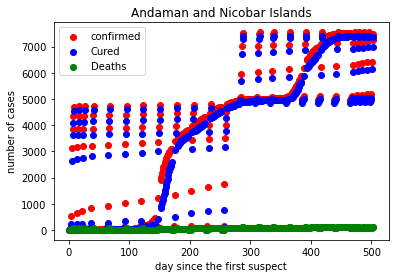

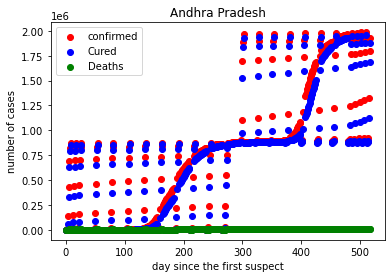

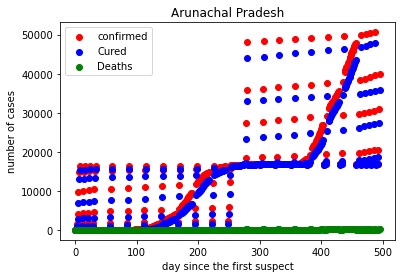

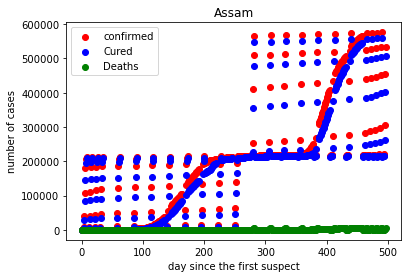

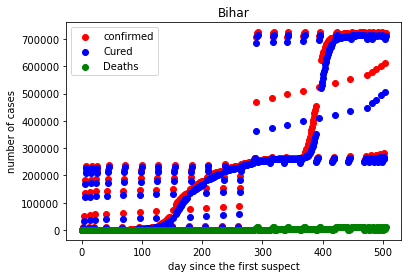

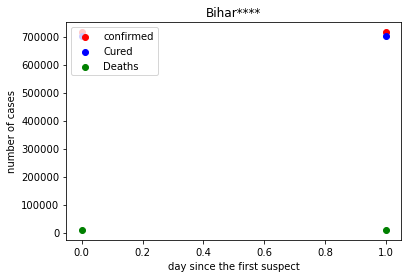

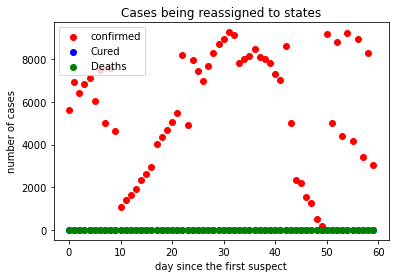

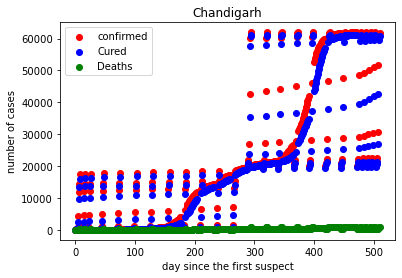

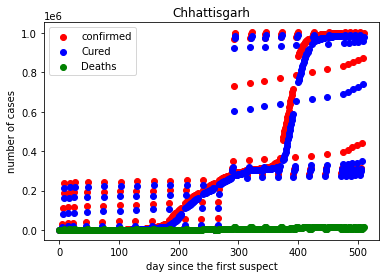

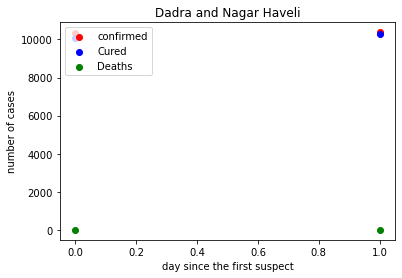

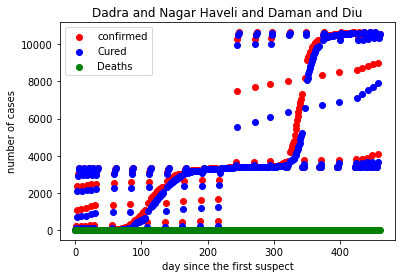

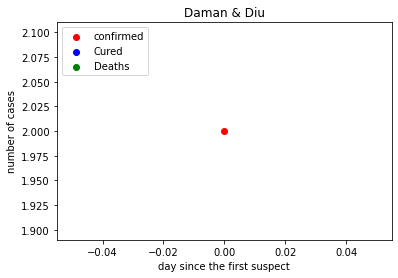

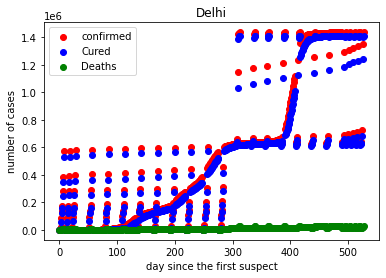

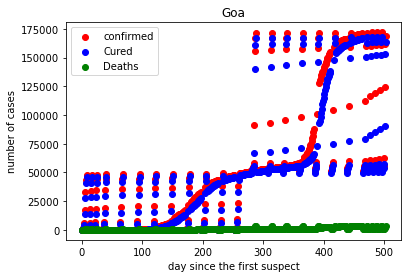

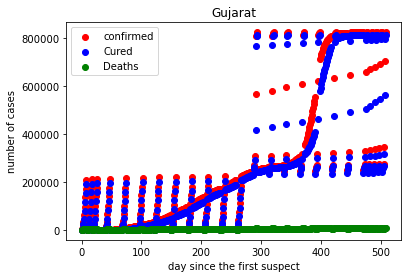

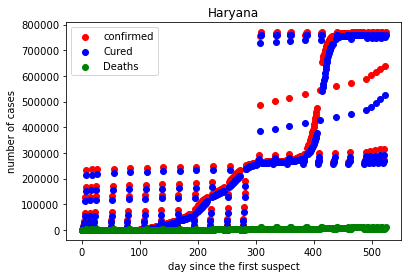

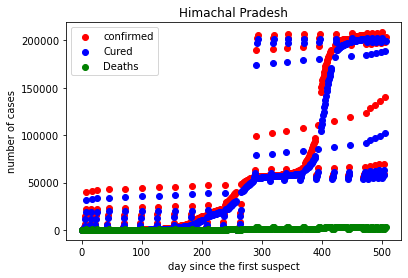

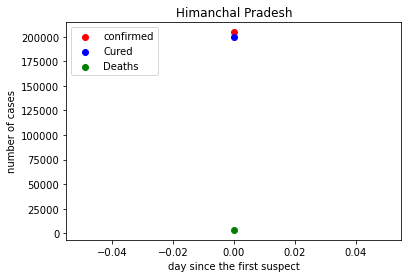

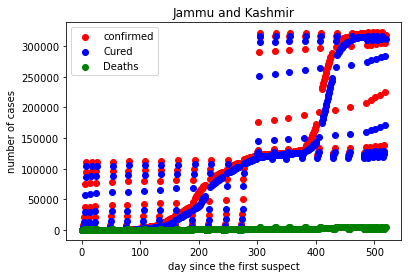

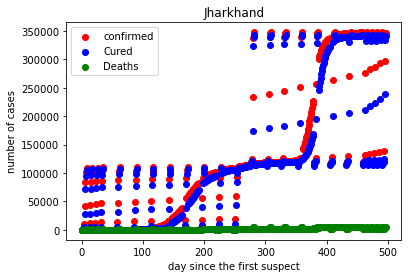

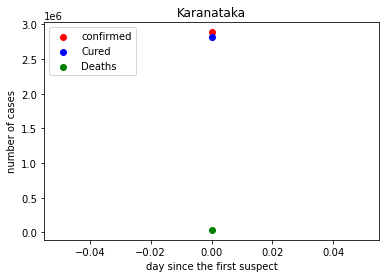

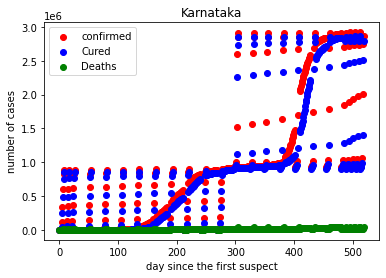

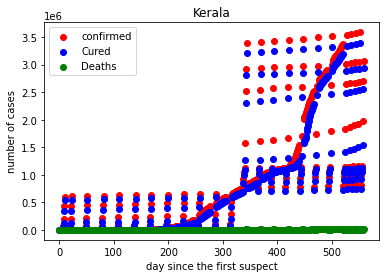

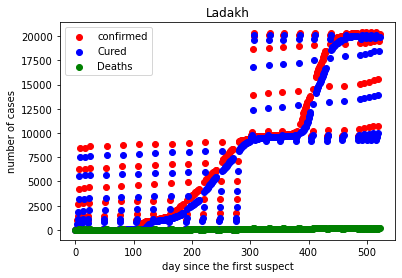

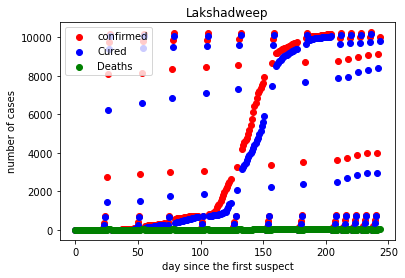

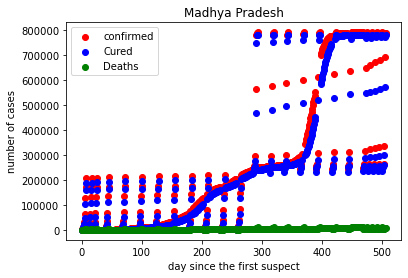

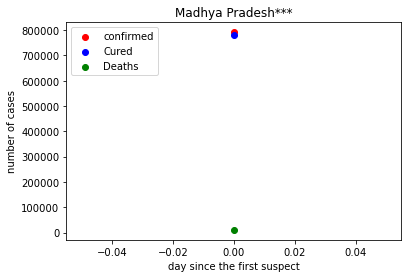

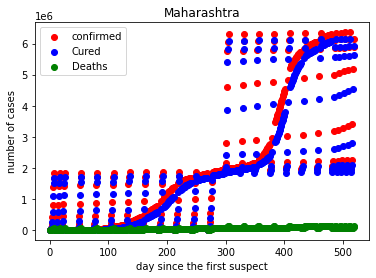

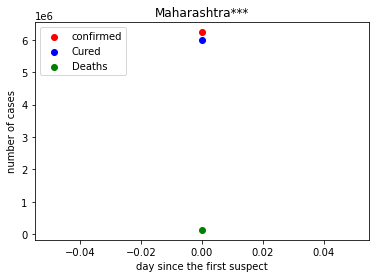

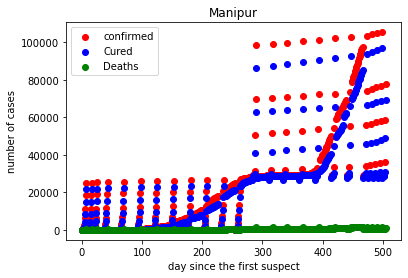

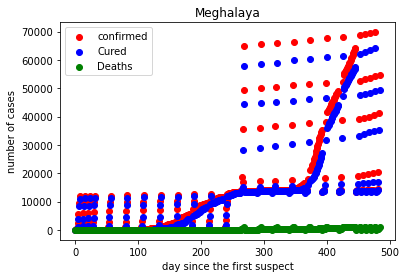

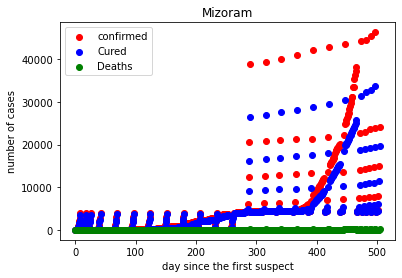

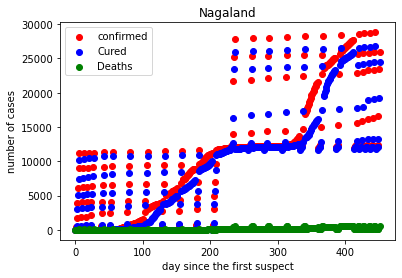

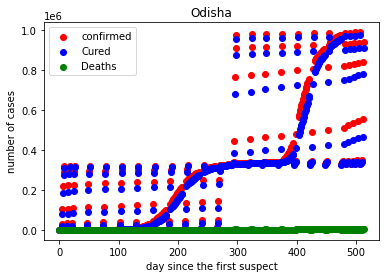

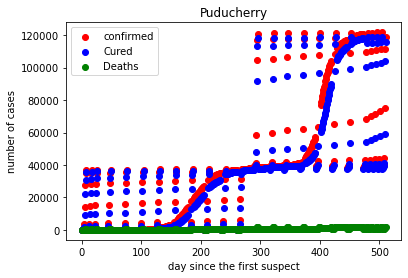

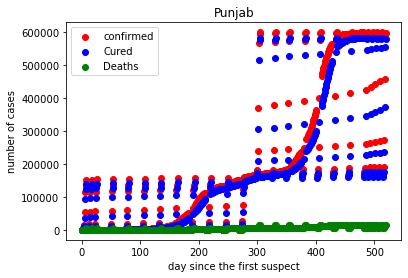

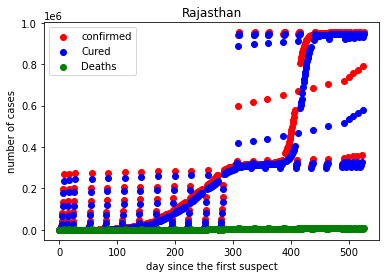

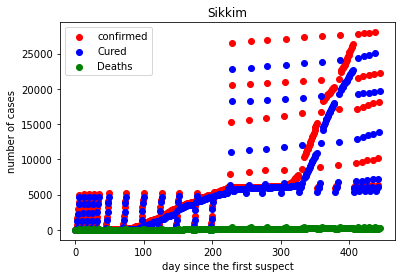

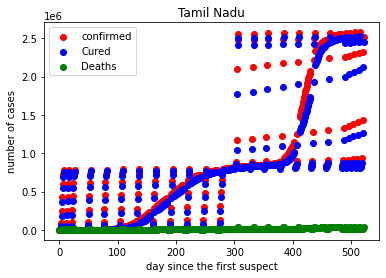

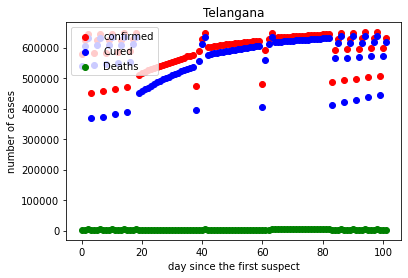

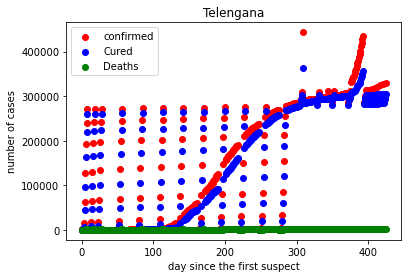

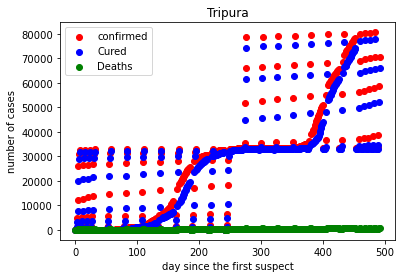

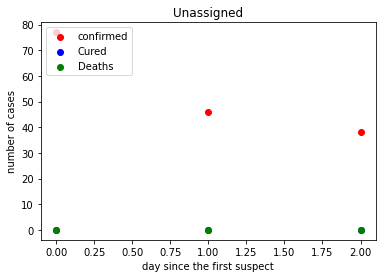

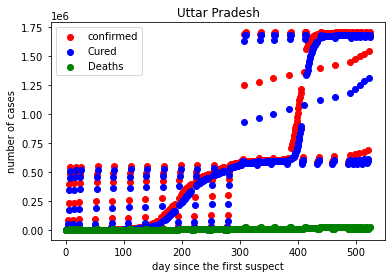

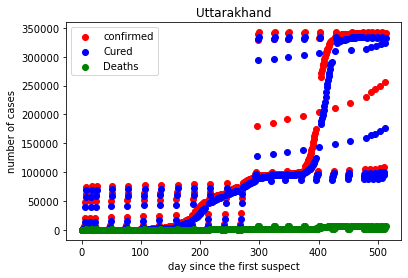

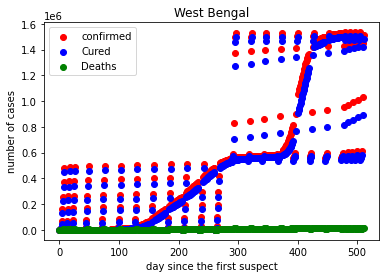

In [36]:
for idx in range(0,len(state)):
    c = df2[df2['State']==state[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['confirmed'],color='red',label='confirmed')
    plt.scatter(np.arange(0,len(c)),c['Cured'],color='blue',label='Cured')
    plt.scatter(np.arange(0,len(c)),c['Deaths'],color='green',label='Deaths')
    plt.title(state[idx])
    plt.xlabel('day since the first suspect')
    plt.ylabel('number of cases')
    plt.legend(loc = "upper left")

    plt.show()